# Machine Learning - Classification

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors

In [4]:
# We are loading the breast cancer data available on UCI Machine learning repository.
df = pd.read_csv("/Users/ankittyagi/Desktop/Python Tutorials/Machine-learning-using-Python/Dataset/breast-cancer-wisconsin.data")
df.replace("?", -99999, inplace = True) # ? are the missing values in the dataset.
df.drop(['Id'], 1, inplace = True) # dropping the id column.
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoii,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
X = np.array(df.drop(["class"], 1)) # features
y = np.array(df["class"]) # labels

# Data split for cross validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

# Train the classifier
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

# Accuracy in the test set
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9714285714285714


In [6]:
# Prediction
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)

In [7]:
print(prediction) 

[2]


# KNN from scratch

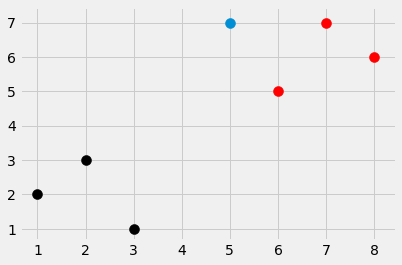

In [12]:
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
from collections import Counter

style.use("fivethirtyeight")

# Now let's say we have 2 classes k and r
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

new_features = [5,7]

# Now let's plot the dataset
[[plt.scatter(ii[0],ii[1], s= 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s= 100)
plt.show()

In [14]:
# Function for KNN
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("Value of k is less than total voting groups")
    # Now we will calculate the distance of predict point with each point in data.
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance,group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return(vote_result)

result = k_nearest_neighbors(dataset, new_features, k = 3)
print(result)
    

r


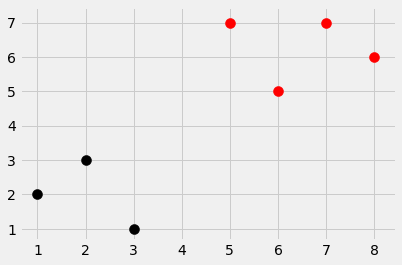

In [15]:
[[plt.scatter(ii[0],ii[1], s= 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s= 100, color = result)
plt.show()

In [18]:
# Now we will apply our fucntion to the breast cancer data.
full_data = df.astype(float).values.tolist()
full_data[:10]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]

In [19]:
# Now we need to shuffle this data so that we can create out train and test group.
import random
random.shuffle(full_data)
full_data[:10]

[[1.0, 1.0, 1.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [7.0, 8.0, 7.0, 2.0, 4.0, 8.0, 3.0, 8.0, 2.0, 4.0],
 [7.0, 5.0, 3.0, 7.0, 4.0, 10.0, 7.0, 5.0, 5.0, 4.0],
 [5.0, 5.0, 5.0, 8.0, 10.0, 8.0, 7.0, 3.0, 7.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0, 2.0],
 [10.0, 5.0, 5.0, 6.0, 3.0, 10.0, 7.0, 9.0, 2.0, 4.0],
 [10.0, 4.0, 3.0, 1.0, 3.0, 3.0, 6.0, 5.0, 2.0, 4.0]]

In [20]:
test_size = 0.2
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

In [21]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
    

In [24]:
correct = 0
total = 0
for group in test_set:
    for features in test_set[group]:
        vote = k_nearest_neighbors(train_set, features, k = 5)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy: ',correct/total)

Accuracy:  0.9856115107913669


In [25]:
# We are getting an accuracy of 98% on the test set.

In [26]:
# Now let's also add confidence in our function.
# Function for KNN
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("Value of k is less than total voting groups")
    # Now we will calculate the distance of predict point with each point in data.
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance,group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return(vote_result, confidence)
    
correct = 0
total = 0
for group in test_set:
    for features in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, features, k = 5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1

print('Accuracy: ',correct/total)

0.8
0.6
Accuracy:  0.9856115107913669


In [27]:
# So the incorrect classification has confidence of 80% and 60% in the result.